In [59]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import happybase as hb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def load_hbase(table_name):
    con  = hb.Connection('localhost')
    table = con.table(table_name)
    rows = table.scan()
    data = [{k.decode().split(' ')[-1]: v.decode() for k, v in r[1].items()} for r in rows]
    con.close()
    df = pd.DataFrame(data)
    df.likes = df.likes.astype(int)
    return df

In [ ]:
df_win = load_hbase(b'country_win')
df_country = load_hbase(b'country_likes')
df_player = load_hbase(b'player_likes')

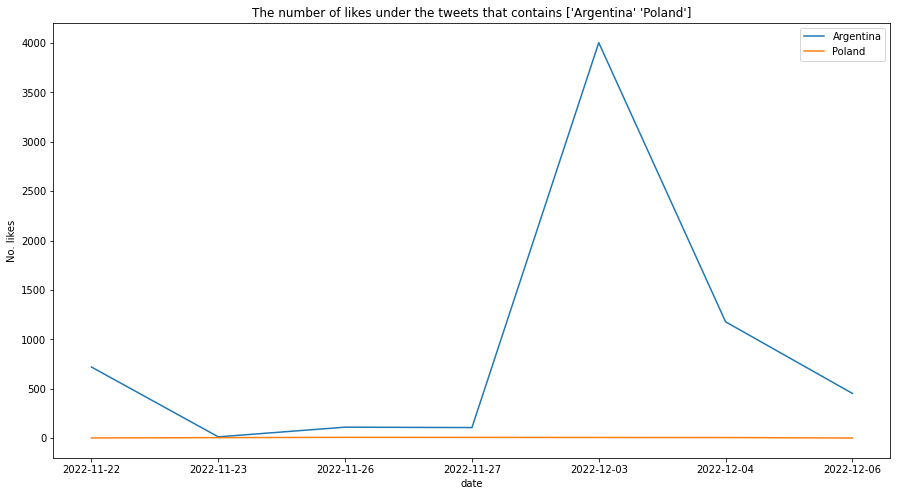

In [95]:
countries = np.array(df_country.country.unique())[[0,5]]

df_list = []
for c in countries:
    df_list.append(df_country[(df_country.country == c) & (df_country.date < '2022-12-18')])

fig, ax = plt.subplots(1,1, figsize=(15, 8))
for df in df_list:
    ax.plot(df.date, df.likes, label = df.country.unique()[0])
ax.set_ylabel('No. likes')
ax.set_xlabel('date')
ax.set_title('The number of likes under the tweets that contains ' + str(countries))
ax.legend()
plt.show()

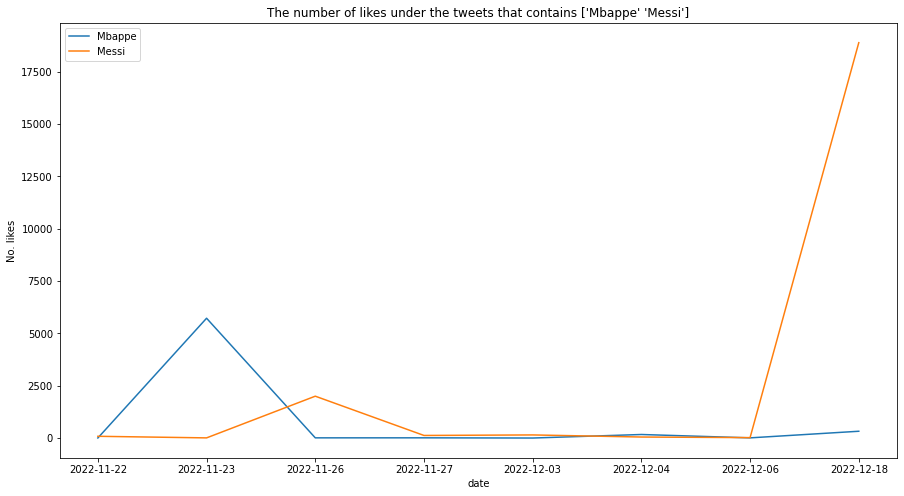

In [106]:
players = np.array(df_player.player.unique())[[2,3]]

df_list = []
for p in players:
    df_list.append(df_player[(df_player.player == p) & (df_player.date < '2023-01-01')])

fig, ax = plt.subplots(1,1, figsize=(15, 8))
for df in df_list:
    ax.plot(df.date, df.likes, label = df.player.unique()[0])
ax.set_ylabel('No. likes')
ax.set_xlabel('date')
ax.set_title('The number of likes under the tweets that contains ' + str(players))
ax.legend()
plt.show()

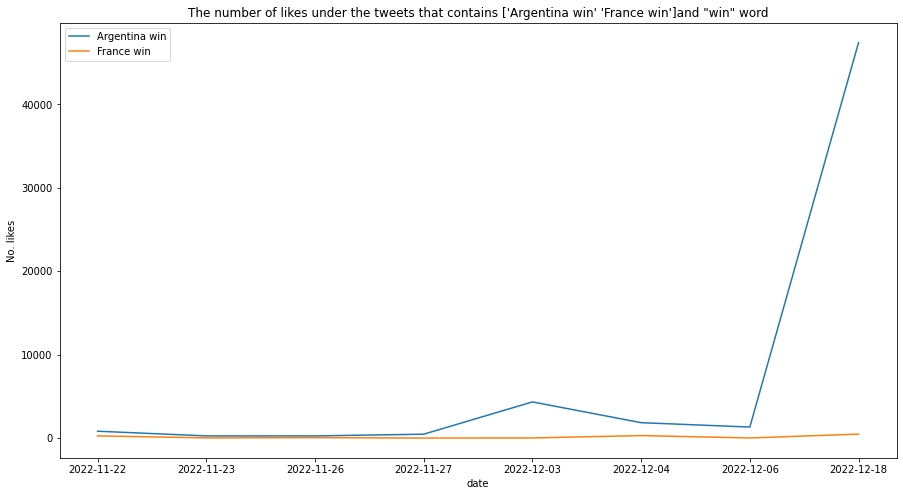

In [109]:
wins = np.array(df_win.win.unique())

df_list = []
for w in wins:
    df_list.append(df_win[(df_win.win == w) & (df_win.date < '2023-01-01')])

fig, ax = plt.subplots(1,1, figsize=(15, 8))
for df in df_list:
    ax.plot(df.date, df.likes, label = df.win.unique()[0])
ax.set_ylabel('No. likes')
ax.set_xlabel('date')
ax.set_title('The number of likes under the tweets that contains ' + str(wins) + 'and "win" word')
ax.legend()
plt.show()